To copy this template: File -> Save a Copy in Drive

***DISCLAIMER**: In case of any discrepancy in the assignment instruction, please refer to the `PDF` document.*

# Problem 2 - Precision, Recall, ROC

## 2.1

**Answer:**
True negatives do matter for the ROC curve, but they do not directly influence its shape or position. The ROC curve is mainly concerned with the trade-off between true positive rate and false positive rate. True negatives are important for calculating the FPR but are not explicitly represented on the ROC curve. The ROC curve is constructed by varying the decision threshold of a binary classifier and plotting TPR against FPR at each threshold.

True negatives are not considered in the PR curve at all. The PR curve focuses on the precision and recall trade-off. Precision is the ratio of true positives to the total number of predicted positives, while recall is the ratio of true positives to the total number of actual positives. True negatives are not part of this calculation.

This correspondence arises from the fact that changing the decision threshold of a binary classifier affects both TPR (which contributes to the ROC curve) and precision (which contributes to the PR curve) in a consistent manner. As the threshold increases, both TPR and precision tend to decrease, creating a unique mapping between ROC and PR points.

This is also because both ROC and PR curves are derived from the same TP and FP counts, and because there is a well-defined translation process between the two spaces while preserving dominance relationships, each point on the ROC curve corresponds uniquely to a point on the PR curve and vice versa. This mathematical correspondence allows for a consistent comparison of classifiers' performance using different evaluation metrics, such as ROC AUC (Area Under the Curve) and PR AUC, and ensures that improvements in one metric correspond to improvements in the other, helping practitioners choose appropriate models for specific tasks.

## 2.2

**Link to dataset:**
https://www.openml.org/search?type=data&status=active&id=43892

In [ ]:
from sklearn.datasets import fetch_openml
from sklearn.metrics import roc_curve, auc, precision_recall_curve, average_precision_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

In [ ]:
data = fetch_openml(data_id= 45547, return_X_y=False, as_frame=True)
data = data["frame"]
print(data)

X = data.drop(columns = ['cardio'])
y = data['cardio'].astype(int)

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


         age gender  height  weight  ap_hi  ap_lo cholesterol gluc smoke alco  \
0      18393      2     168    62.0  110.0   80.0           1    1     0    0   
1      20228      1     156    85.0  140.0   90.0           3    1     0    0   
2      18857      1     165    64.0  130.0   70.0           3    1     0    0   
3      17623      2     169    82.0  150.0  100.0           1    1     0    0   
4      17474      1     156    56.0  100.0   60.0           1    1     0    0   
...      ...    ...     ...     ...    ...    ...         ...  ...   ...  ...   
69995  19240      2     168    76.0  120.0   80.0           1    1     1    0   
69996  22601      1     158   126.0  140.0   90.0           2    2     0    0   
69997  19066      2     183   105.0  180.0   90.0           3    1     0    1   
69998  22431      1     163    72.0  135.0   80.0           1    2     0    0   
69999  20540      1     170    72.0  120.0   80.0           2    1     0    0   

      active cardio  
0    

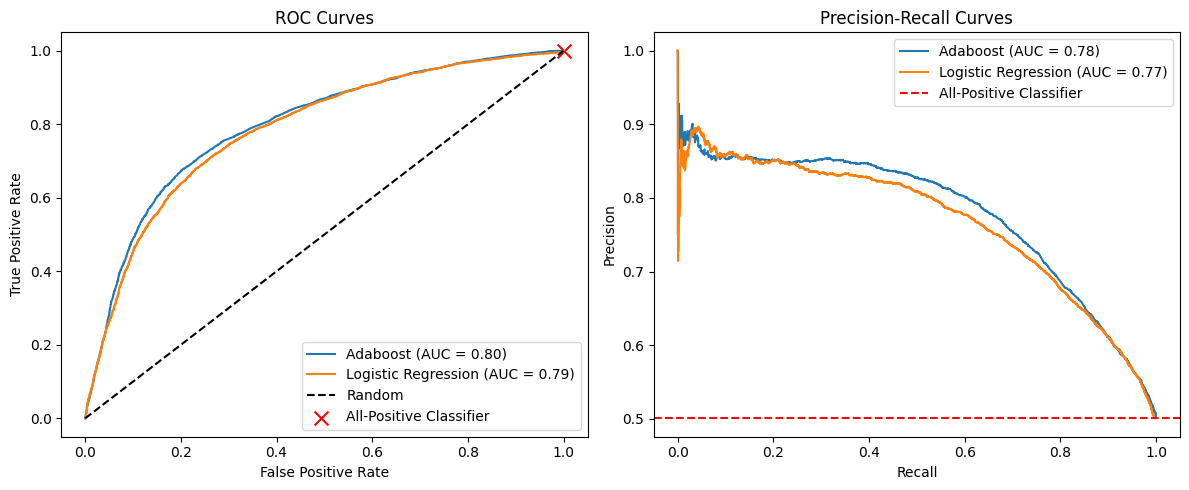

In [ ]:
import numpy as np
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the input data (standardization)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train the classifiers
ada_classifier = AdaBoostClassifier(n_estimators=50, random_state=42)
logreg_classifier = LogisticRegression(random_state=42, C=1e5)  # Adjust regularization parameter C

ada_classifier.fit(X_train, y_train)
logreg_classifier.fit(X_train, y_train)

# Predict probabilities for each class
ada_probs = ada_classifier.predict_proba(X_test)[:, 1]
logreg_probs = logreg_classifier.predict_proba(X_test)[:, 1]

# Compute ROC and PR curves
ada_fpr, ada_tpr, _ = roc_curve(y_test, ada_probs)
logreg_fpr, logreg_tpr, _ = roc_curve(y_test, logreg_probs)

ada_precision, ada_recall, _ = precision_recall_curve(y_test, ada_probs)
logreg_precision, logreg_recall, _ = precision_recall_curve(y_test, logreg_probs)

# Calculate areas under the curves (AUC)
ada_roc_auc = auc(ada_fpr, ada_tpr)
logreg_roc_auc = auc(logreg_fpr, logreg_tpr)

ada_pr_auc = auc(ada_recall, ada_precision)
logreg_pr_auc = auc(logreg_recall, logreg_precision)

# Plot ROC and PR curves
plt.figure(figsize=(12, 5))

# ROC Curves
plt.subplot(1, 2, 1)
plt.plot(ada_fpr, ada_tpr, label=f'Adaboost (AUC = {ada_roc_auc:.2f})')
plt.plot(logreg_fpr, logreg_tpr, label=f'Logistic Regression (AUC = {logreg_roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.scatter(1, 1, color='red', marker='x', s=100, label='All-Positive Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves')
plt.legend()

# PR Curves
plt.subplot(1, 2, 2)
plt.plot(ada_recall, ada_precision, label=f'Adaboost (AUC = {ada_pr_auc:.2f})')
plt.plot(logreg_recall, logreg_precision, label=f'Logistic Regression (AUC = {logreg_pr_auc:.2f})')
plt.axhline(y=np.mean(y_test), color='red', linestyle='--', label='All-Positive Classifier')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curves')
plt.legend()

plt.tight_layout()
plt.show()

**Answer:**

ROC Curve:
AdaBoost: The curve for AdaBoost has an AUC of 0.80. This value indicates a relatively good performance, as an AUC of 1 represents a perfect classifier, while an AUC of 0.5 represents a random classifier.

Logistic Regression: Its curve is slightly below AdaBoost with an AUC of 0.79, indicating similar performance but slightly below AdaBoost.

All-Positive Classifier: The red 'X' on the ROC curve represents the point of the All-Positive Classifier. It lies at the top right corner because this classifier will have a True Positive Rate of 1 (since it classifies everything as positive) and a False Positive Rate of 1 (since all negatives are also classified as positives).

Precision-Recall Curve:
AdaBoost: The PR curve for AdaBoost has an AUC of 0.78.

Logistic Regression: Its PR curve is slightly below AdaBoost with an AUC of 0.77.

All-Positive Classifier: The red dashed line on the PR curve represents the precision of the All-Positive Classifier, which is equal to the proportion of actual positives in the test set. This is because precision for an all-positive classifier will be the ratio of true positives to the sum of true positives and false positives, which is essentially the mean of the target variable y_test

Both AdaBoost and Logistic Regression perform similarly, with Adaboost very slightly above. The ROC and PR curves visually support this conclusion. The distance of the classifiers' curves from the All-Positive Classifier or the random classifier indicates their respective performance.